# From youtube tutorial: https://www.youtube.com/watch?v=c0k-YLQGKjY

Single variable

Predicting future values of a single variable using steps = 5

In [1]:
import tensorflow as tf 
import os
import pandas as pd
import numpy as np

In [2]:
caiso_df = pd.read_csv("/Users/yukahatori/A_Fairness/CAISO-netdemand-20200101.csv", on_bad_lines = 'skip')
caiso_df.drop(labels = [0,2,3], axis = 0)

,Net Demand 01/01/2020,00:00,00:05,00:10,00:15,00:20,00:25,00:30,00:35,00:40,...,23:15,23:20,23:25,23:30,23:35,23:40,23:45,23:50,23:55,00:00.1
1,Demand,21533,21429,21320,21272,21193,21109,21006,20961,20916,...,20920,20809,20681,20574,20494,20383,20297,20242,20128,20025.0


In [3]:
#January 1st, 24 hours 
df = pd.read_csv("/Users/yukahatori/A_Fairness/USW00023234.csv")

#drop columns we don't need
df.drop('STATION', axis=1, inplace=True)
df.drop('NAME', axis=1, inplace=True)
df.drop('LATITUDE', axis=1, inplace=True)
df.drop('LONGITUDE', axis=1, inplace=True)
df.drop('ELEVATION', axis=1, inplace=True)
df.drop('month', axis=1, inplace=True)
df.drop('hour', axis=1, inplace=True)
df.drop('day', axis=1, inplace=True)

#checks the flags and removes any rows corresponding with 'M' which means the data is missing
measurementFlags = list(df.filter(regex='meas'))
for flag in measurementFlags:
    df = df[~df[flag].str.contains('M')]

completenessFlags = list(df.filter(regex='meas'))
for flag in completenessFlags:
    df = df[~df[flag].str.contains('-9999')]
        
#get rid of all measurement and completeness flags
df = df[df.columns.drop(list(df.filter(regex='meas')))]
df = df[df.columns.drop(list(df.filter(regex='comp')))]

#rename columns
df.columns = ['date', 'HLY_TEMP_NORMAL', 'years_HLY_TEMP_NORMAL', 'HLY_TEMP_10PCTL',
       'years_HLY_TEMP_10PCTL', 'HLY_TEMP_90PCTL', 'years_HLY_TEMP_90PCTL',
       'HLY_DEWP_NORMAL', 'years_HLY_DEWP_NORMAL', 'HLY_DEWP_10PCTL',
       'years_HLY_DEWPv10PCTL', 'HLY_DEWP_90PCTL', 'years_HLY_DEWP_90PCTL',
       'HLY_PRES_NORMAL', 'years_HLY_PRES_NORMAL', 'HLY_PRES_10PCTL',
       'years_HLY_PRES_10PCTL', 'HLY_PRES_90PCTL', 'years_HLY_PRES_90PCTL',
       'HLY_CLDH_NORMAL', 'years_HLY_CLDH_NORMAL', 'HLY_HTDH_NORMAL',
       'years_HLY_HTDH_NORMAL', 'HLY_CLOD_PCTCLR', 'years_HLY_CLOD_PCTCLR',
       'HLY_CLOD_PCTFEW', 'years_HLY_CLOD_PCTFEW', 'HLY_CLOD_PCTSCT',
       'years_HLY_CLOD_PCTSCT', 'HLY_CLOD_PCTBKN', 'years_HLY_CLOD_PCTBKN',
       'HLY_CLOD_PCTOVC', 'years_HLY_CLOD_PCTOVC', 'HLY_HIDX_NORMAL',
       'years_HLY_HIDX_NORMAL', 'HLY_WCHL_NORMAL', 'years_HLY_WCHL_NORMAL',
       'HLY_WIND_AVGSPD', 'years_HLY_WIND_AVGSPD', 'HLY_WIND_PCTCLM',
       'years_HLY_WIND_PCTCLM', 'HLY_WIND_VCTDIR', 'years_HLY_WIND_VCTDIR',
       'HLY_WIND_VCTSPD', 'years_HLY_WIND_VCTSPD', 'HLY_WIND_1STDIR',
       'years_HLY-WIND-1STDIR', 'HLY_WIND_1STPCT', 'years_HLY_WIND_1STPCT',
       'HLY_WIND_2NDDIR', 'years_HLY_WIND_2NDDIR', 'HLY_WIND_2NDPCT',
       'years_HLY_WIND_2NDPCT']
#DROPPING COLUMNS FOR TESTING
df = df.drop(columns=[ 'HLY_TEMP_10PCTL',
       'years_HLY_TEMP_10PCTL', 'HLY_TEMP_90PCTL', 'years_HLY_TEMP_90PCTL',
       'HLY_DEWP_NORMAL', 'years_HLY_DEWP_NORMAL', 'HLY_DEWP_10PCTL',
       'years_HLY_DEWPv10PCTL', 'HLY_DEWP_90PCTL', 'years_HLY_DEWP_90PCTL',
       'HLY_PRES_NORMAL', 'years_HLY_PRES_NORMAL', 'HLY_PRES_10PCTL',
       'years_HLY_PRES_10PCTL', 'HLY_PRES_90PCTL', 'years_HLY_PRES_90PCTL',
       'HLY_CLDH_NORMAL', 'years_HLY_CLDH_NORMAL', 'HLY_HTDH_NORMAL',
       'years_HLY_HTDH_NORMAL', 'HLY_CLOD_PCTCLR', 'years_HLY_CLOD_PCTCLR',
       'HLY_CLOD_PCTFEW', 'years_HLY_CLOD_PCTFEW', 'HLY_CLOD_PCTSCT',
       'years_HLY_CLOD_PCTSCT', 'HLY_CLOD_PCTBKN', 'years_HLY_CLOD_PCTBKN',
       'HLY_CLOD_PCTOVC', 'years_HLY_CLOD_PCTOVC', 'HLY_HIDX_NORMAL',
       'years_HLY_HIDX_NORMAL', 'HLY_WCHL_NORMAL', 'years_HLY_WCHL_NORMAL',
       'HLY_WIND_AVGSPD', 'years_HLY_WIND_AVGSPD', 'HLY_WIND_PCTCLM',
       'years_HLY_WIND_PCTCLM', 'HLY_WIND_VCTDIR', 'years_HLY_WIND_VCTDIR',
       'HLY_WIND_VCTSPD', 'years_HLY_WIND_VCTSPD', 'HLY_WIND_1STDIR',
       'years_HLY-WIND-1STDIR', 'HLY_WIND_1STPCT', 'years_HLY_WIND_1STPCT',
       'HLY_WIND_2NDDIR', 'years_HLY_WIND_2NDDIR', 'HLY_WIND_2NDPCT',
       'years_HLY_WIND_2NDPCT'])
print("-------------------------------NEW COLUMNS-----------------------------")
print(df)
print('---------------------------------DESCRIBE------------------------------')
#describe
print(df.describe())

-------------------------------NEW COLUMNS-----------------------------
                date  HLY_TEMP_NORMAL  years_HLY_TEMP_NORMAL
0     01-01T00:00:00             48.8                     30
1     01-01T01:00:00             48.5                     30
2     01-01T02:00:00             47.6                     30
3     01-01T03:00:00             47.2                     30
4     01-01T04:00:00             46.8                     30
...              ...              ...                    ...
8755  12-31T19:00:00             51.5                     30
8756  12-31T20:00:00             51.0                     30
8757  12-31T21:00:00             50.5                     30
8758  12-31T22:00:00             49.8                     30
8759  12-31T23:00:00             49.4                     30

[8727 rows x 3 columns]
---------------------------------DESCRIBE------------------------------
       HLY_TEMP_NORMAL  years_HLY_TEMP_NORMAL
count      8727.000000                 8727.0
mean   

In [4]:
# I wanted to append the year, but it is not working on index = 105 for some reason
# for i in range(len(df['date'])-1):
#     print("I value: ", i)
#     prevDate = "2020-" + df['date'][i]
#     df.at[i, 'date'] = prevDate
#     print(df.loc[['date'][i]])



In [5]:
df.index = pd.to_datetime(df['date'], format='%m-%dT%H:%M:%S')
df[:26]

,date,HLY_TEMP_NORMAL,years_HLY_TEMP_NORMAL
date,,,
1900-01-01 00:00:00,01-01T00:00:00,48.8,30
1900-01-01 01:00:00,01-01T01:00:00,48.5,30
1900-01-01 02:00:00,01-01T02:00:00,47.6,30
1900-01-01 03:00:00,01-01T03:00:00,47.2,30
1900-01-01 04:00:00,01-01T04:00:00,46.8,30
1900-01-01 05:00:00,01-01T05:00:00,46.6,30
1900-01-01 06:00:00,01-01T06:00:00,46.6,30
1900-01-01 07:00:00,01-01T07:00:00,46.8,30
1900-01-01 08:00:00,01-01T08:00:00,47.2,30


<AxesSubplot:xlabel='date'>

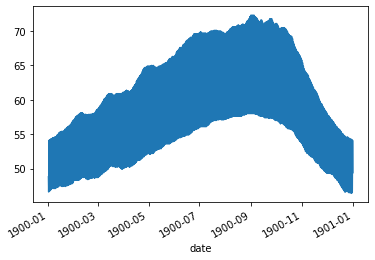

In [6]:
temp = df['HLY_TEMP_NORMAL']
temp.plot()

- temperature at hour: 1,2,3,4,5 and predict for hour:6
- temperature at hour: 2,3,4,5,6 and predict for hour: 7
- output: y vector - [6] [7] 
- input: x matrix? - [1,2,3,4,5] [2,3,4,5,6]

1. to make it multivariate:
- temperature and clouds at hour: 1,2,3,4,5 and predict for hour:6
- temperature at hour: 2,3,4,5,6 and predict for hour: 7
- output: y vector - [6] [7] 
- input: x matrix? - [[1,cloud1],[2, cloud2],[3,cloud3],[4, cloud4],[5,cloud5] [2,3,4,5,6] etc etc

In [7]:
#make the X data = [1,2,3,4,5] the list of lists with 5 pieces of past data
# make the y data = output prediction
def df_to_X_y(df, window_size= 5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [ [a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)
        

In [8]:
WINDOW_SIZE = 5
X, y = df_to_X_y(temp, WINDOW_SIZE)
X.shape, y.shape

((8722, 5, 1), (8722,))

# Train and testing data

In [9]:
X_train, y_train = X[:6000], y[:6000]
X_val, y_val = X[6000:6500], y[6000:6500]
X_test, y_test = X[6500:], y[6500:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((6000, 5, 1), (6000,), (500, 5, 1), (500,), (2222, 5, 1), (2222,))

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [1]:
model1 = Sequential()
#from X_train.shape which is 6000, 5, 1
model1.add(InputLayer((5,1)))
model1.add(LSTM(64)) #or GRU; ??? why 64
model1.add(Dense(8, 'relu')) #relu to learn non-linear dependencies
model1.add(Dense(1, 'linear')) #linear value, pos or neg (for temp)
model1.summary()

NameError: name 'Sequential' is not defined

In [13]:
cp = ModelCheckpoint('model1/', save_best_only = True) #I want to only save the best model (lowest validation loss)
#learning rate = higher the value, faster model tries to decrease loss
#but we don't want to dec super fast bc it won't find local min/max
model1.compile(loss = MeanSquaredError(), optimizer = Adam(learning_rate = 0.0001), metrics = [RootMeanSquaredError()])


In [14]:
# epochs - each sample in the training dataset has had an opportunity to update the internal model parameters
# callbacks - an object that can perform actions at various stages of training
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 10, callbacks = [cp])

Epoch 1/10
187/188 [============================>.] - ETA: 0s - loss: 3309.6211 - root_mean_squared_error: 57.5293

2022-02-08 10:02:49.119475: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 6s 21ms/step - loss: 3309.2874 - root_mean_squared_error: 57.5264 - val_loss: 3778.6753 - val_root_mean_squared_error: 61.4709
Epoch 2/10
183/188 [============================>.] - ETA: 0s - loss: 2967.1609 - root_mean_squared_error: 54.4717

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 4s 19ms/step - loss: 2957.8560 - root_mean_squared_error: 54.3862 - val_loss: 3256.4460 - val_root_mean_squared_error: 57.0653
Epoch 3/10
187/188 [============================>.] - ETA: 0s - loss: 2402.2000 - root_mean_squared_error: 49.0122

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 4s 19ms/step - loss: 2400.9731 - root_mean_squared_error: 48.9997 - val_loss: 2663.5244 - val_root_mean_squared_error: 51.6093
Epoch 4/10
178/188 [===========================>..] - ETA: 0s - loss: 1943.6023 - root_mean_squared_error: 44.0863

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 4s 20ms/step - loss: 1935.7327 - root_mean_squared_error: 43.9970 - val_loss: 2218.0322 - val_root_mean_squared_error: 47.0960
Epoch 5/10
177/188 [===========================>..] - ETA: 0s - loss: 1627.0824 - root_mean_squared_error: 40.3371

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 4s 20ms/step - loss: 1620.9034 - root_mean_squared_error: 40.2604 - val_loss: 1912.9420 - val_root_mean_squared_error: 43.7372
Epoch 6/10
188/188 [==============================] - ETA: 0s - loss: 1378.7446 - root_mean_squared_error: 37.1315

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 4s 19ms/step - loss: 1378.7446 - root_mean_squared_error: 37.1315 - val_loss: 1654.3494 - val_root_mean_squared_error: 40.6737
Epoch 7/10
186/188 [============================>.] - ETA: 0s - loss: 1163.9495 - root_mean_squared_error: 34.1167

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 4s 21ms/step - loss: 1162.9615 - root_mean_squared_error: 34.1022 - val_loss: 1409.6183 - val_root_mean_squared_error: 37.5449
Epoch 8/10
185/188 [============================>.] - ETA: 0s - loss: 961.5039 - root_mean_squared_error: 31.0081

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 4s 21ms/step - loss: 959.8278 - root_mean_squared_error: 30.9811 - val_loss: 1188.3032 - val_root_mean_squared_error: 34.4718
Epoch 9/10
183/188 [============================>.] - ETA: 0s - loss: 786.4459 - root_mean_squared_error: 28.0436

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 4s 22ms/step - loss: 784.0019 - root_mean_squared_error: 28.0000 - val_loss: 992.1462 - val_root_mean_squared_error: 31.4984
Epoch 10/10
170/188 [==========================>...] - ETA: 0s - loss: 635.7949 - root_mean_squared_error: 25.2150

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 4s 20ms/step - loss: 630.0799 - root_mean_squared_error: 25.1014 - val_loss: 817.8116 - val_root_mean_squared_error: 28.5974


In [15]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [16]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data = {'Train Predictions': train_predictions, 'Actuals':y_train})
train_results

,Train Predictions,Actuals
0,34.559711,46.6
1,34.559696,46.6
2,34.559757,46.8
3,34.559902,47.2
4,34.560131,48.9
...,...,...
5995,34.562412,63.9
5996,34.562508,66.0
5997,34.562321,68.0
5998,34.561806,69.6


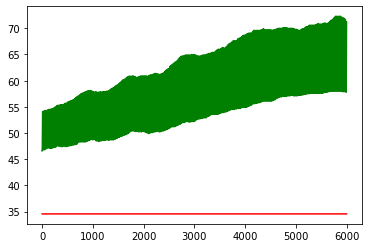

In [18]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:], color = 'red')
plt.plot(train_results['Actuals'][:], color = 'green')

In [24]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data = {'Val Predictions': val_predictions, 'Actuals':y_val})
val_results

,Val Predictions,Actuals
0,28.905230,71.5
1,28.904537,70.6
2,28.903917,68.9
3,28.903429,66.6
4,28.903296,63.9
...,...,...
495,28.906225,57.0
496,28.906303,57.2
497,28.906427,58.4
498,28.906698,61.3


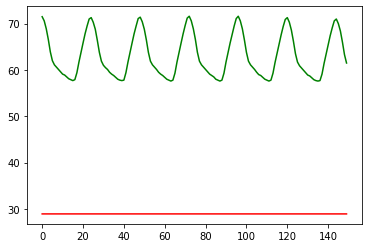

In [25]:
plt.plot(val_results['Val Predictions'][:150], color = 'red')
plt.plot(val_results['Actuals'][:150], color = 'green')

# Part 2 : https://www.youtube.com/watch?v=kGdbPnMCdOg

In [28]:
from sklearn.metrics import mean_squared_error as mse
def plot_predictions1(model, X, y, start = 0, end = 100):
    predictions = model.predict(X).flatten()
    df = pd.DataFrame(data = {'Predictions':predictions, 'Actuals':y})
    plt.plot(df['Predictions'][start:end], color = 'red')
    plt.plot(df['Actuals'][start:end], color = 'green')
    return df, mse(y, predictions)
    

(      Predictions  Actuals
 0       28.907272     65.4
 1       28.907129     67.3
 2       28.906603     69.1
 3       28.906034     70.6
 4       28.905424     71.1
 ...           ...      ...
 2217    28.906092     51.5
 2218    28.905966     51.0
 2219    28.905958     50.5
 2220    28.905956     49.8
 2221    28.905870     49.4
 
 [2222 rows x 2 columns],
 770.8720437446483)

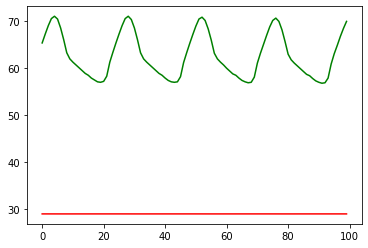

In [29]:
plot_predictions1(model1, X_test, y_test)

In [30]:
model2 = Sequential()
#from X_train.shape which is 6000, 5, 1
model2.add(InputLayer((5,1)))
model2.add(Conv1D(64, kernel_size = 2)) #how many windows do we want to slide across
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear')) #linear value, pos or neg (for temp)
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             192       
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 8)                 2056      
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________


In [31]:
cp2 = ModelCheckpoint('model2/', save_best_only = True) #I want to only save the best model (lowest validation loss)
#learning rate = higher the value, faster model tries to decrease loss
#but we don't want to dec super fast bc it won't find local min/max
model2.compile(loss = MeanSquaredError(), optimizer =Adam(learning_rate = 0.0001), metrics = [RootMeanSquaredError()])

In [32]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 10, callbacks = [cp2])

Epoch 1/10
179/188 [===========================>..] - ETA: 0s - loss: 785.3374 - root_mean_squared_error: 28.0239

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


188/188 [==============================] - 5s 21ms/step - loss: 781.5992 - root_mean_squared_error: 27.9571 - val_loss: 1004.0199 - val_root_mean_squared_error: 31.6863
Epoch 2/10
176/188 [===========================>..] - ETA: 0s - loss: 652.9824 - root_mean_squared_error: 25.5535

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


188/188 [==============================] - 4s 20ms/step - loss: 648.7673 - root_mean_squared_error: 25.4709 - val_loss: 850.3055 - val_root_mean_squared_error: 29.1600
Epoch 3/10
173/188 [==========================>...] - ETA: 0s - loss: 532.2485 - root_mean_squared_error: 23.0705

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


188/188 [==============================] - 3s 18ms/step - loss: 529.6354 - root_mean_squared_error: 23.0138 - val_loss: 712.1887 - val_root_mean_squared_error: 26.6869
Epoch 4/10
176/188 [===========================>..] - ETA: 0s - loss: 428.6247 - root_mean_squared_error: 20.7033

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


188/188 [==============================] - 4s 20ms/step - loss: 425.0707 - root_mean_squared_error: 20.6172 - val_loss: 588.6951 - val_root_mean_squared_error: 24.2630
Epoch 5/10
178/188 [===========================>..] - ETA: 0s - loss: 337.3377 - root_mean_squared_error: 18.3668

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


188/188 [==============================] - 3s 18ms/step - loss: 334.7925 - root_mean_squared_error: 18.2973 - val_loss: 480.0565 - val_root_mean_squared_error: 21.9102
Epoch 6/10
179/188 [===========================>..] - ETA: 0s - loss: 256.7196 - root_mean_squared_error: 16.0225

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


188/188 [==============================] - 4s 19ms/step - loss: 255.3192 - root_mean_squared_error: 15.9787 - val_loss: 379.8363 - val_root_mean_squared_error: 19.4894
Epoch 7/10
176/188 [===========================>..] - ETA: 0s - loss: 192.4641 - root_mean_squared_error: 13.8731

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


188/188 [==============================] - 3s 17ms/step - loss: 191.2703 - root_mean_squared_error: 13.8301 - val_loss: 300.8572 - val_root_mean_squared_error: 17.3452
Epoch 8/10
173/188 [==========================>...] - ETA: 0s - loss: 143.3059 - root_mean_squared_error: 11.9710

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


188/188 [==============================] - 3s 18ms/step - loss: 142.3439 - root_mean_squared_error: 11.9308 - val_loss: 236.7395 - val_root_mean_squared_error: 15.3863
Epoch 9/10
173/188 [==========================>...] - ETA: 0s - loss: 106.1170 - root_mean_squared_error: 10.3013

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


188/188 [==============================] - 3s 18ms/step - loss: 105.5451 - root_mean_squared_error: 10.2735 - val_loss: 185.8887 - val_root_mean_squared_error: 13.6341
Epoch 10/10
188/188 [==============================] - ETA: 0s - loss: 79.0164 - root_mean_squared_error: 8.8891

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


188/188 [==============================] - 4s 19ms/step - loss: 79.0164 - root_mean_squared_error: 8.8891 - val_loss: 146.3728 - val_root_mean_squared_error: 12.0985


(      Predictions  Actuals
 0       10.647606     65.4
 1       10.771258     67.3
 2       11.304397     69.1
 3       11.684444     70.6
 4       12.041080     71.1
 ...           ...      ...
 2217     9.820410     51.5
 2218     9.779753     51.0
 2219     9.644927     50.5
 2220     9.510235     49.8
 2221     9.374874     49.4
 
 [2222 rows x 2 columns],
 2126.2928751437425)

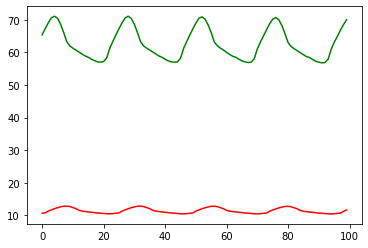

In [34]:
plot_predictions1(model2, X_test, y_test)

In [35]:
model3 = Sequential()
#from X_train.shape which is 6000, 5, 1
model3.add(InputLayer((5,1)))
model3.add(GRU(64)) #how many windows do we want to slide across
model3.add(Flatten())
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear')) #linear value, pos or neg (for temp)
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 64)                12864     
                                                                 
 flatten_2 (Flatten)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________


In [36]:
cp3 = ModelCheckpoint('model3/', save_best_only = True) #I want to only save the best model (lowest validation loss)
#learning rate = higher the value, faster model tries to decrease loss
#but we don't want to dec super fast bc it won't find local min/max
model3.compile(loss = MeanSquaredError(), optimizer =Adam(learning_rate = 0.0001), metrics = [RootMeanSquaredError()])
model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 10, callbacks = [cp3])

Epoch 1/10
172/188 [==========================>...] - ETA: 0s - loss: 3339.9854 - root_mean_squared_error: 57.7926

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


188/188 [==============================] - 5s 20ms/step - loss: 3339.9983 - root_mean_squared_error: 57.7927 - val_loss: 3959.8511 - val_root_mean_squared_error: 62.9273
Epoch 2/10
177/188 [===========================>..] - ETA: 0s - loss: 3330.9907 - root_mean_squared_error: 57.7147

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


188/188 [==============================] - 3s 18ms/step - loss: 3335.3567 - root_mean_squared_error: 57.7525 - val_loss: 3957.4934 - val_root_mean_squared_error: 62.9086
Epoch 3/10
177/188 [===========================>..] - ETA: 0s - loss: 3332.1360 - root_mean_squared_error: 57.7247

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


188/188 [==============================] - 3s 16ms/step - loss: 3333.1963 - root_mean_squared_error: 57.7338 - val_loss: 3955.1360 - val_root_mean_squared_error: 62.8899
Epoch 4/10
169/188 [=========================>....] - ETA: 0s - loss: 3328.9380 - root_mean_squared_error: 57.6969

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


188/188 [==============================] - 3s 18ms/step - loss: 3331.0393 - root_mean_squared_error: 57.7152 - val_loss: 3952.7803 - val_root_mean_squared_error: 62.8711
Epoch 5/10
187/188 [============================>.] - ETA: 0s - loss: 3329.2102 - root_mean_squared_error: 57.6993

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


188/188 [==============================] - 3s 17ms/step - loss: 3328.8806 - root_mean_squared_error: 57.6965 - val_loss: 3950.4246 - val_root_mean_squared_error: 62.8524
Epoch 6/10
179/188 [===========================>..] - ETA: 0s - loss: 3328.2576 - root_mean_squared_error: 57.6911

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


188/188 [==============================] - 4s 21ms/step - loss: 3326.7273 - root_mean_squared_error: 57.6778 - val_loss: 3948.0708 - val_root_mean_squared_error: 62.8337
Epoch 7/10
170/188 [==========================>...] - ETA: 0s - loss: 3319.4475 - root_mean_squared_error: 57.6146

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


188/188 [==============================] - 3s 15ms/step - loss: 3324.5718 - root_mean_squared_error: 57.6591 - val_loss: 3945.7185 - val_root_mean_squared_error: 62.8150
Epoch 8/10
168/188 [=========================>....] - ETA: 0s - loss: 3324.4189 - root_mean_squared_error: 57.6578

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


188/188 [==============================] - 3s 16ms/step - loss: 3322.4197 - root_mean_squared_error: 57.6404 - val_loss: 3943.3657 - val_root_mean_squared_error: 62.7962
Epoch 9/10
168/188 [=========================>....] - ETA: 0s - loss: 3316.6792 - root_mean_squared_error: 57.5906

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


188/188 [==============================] - 3s 14ms/step - loss: 3320.2644 - root_mean_squared_error: 57.6217 - val_loss: 3941.0151 - val_root_mean_squared_error: 62.7775
Epoch 10/10
187/188 [============================>.] - ETA: 0s - loss: 3318.2979 - root_mean_squared_error: 57.6047

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


188/188 [==============================] - 3s 18ms/step - loss: 3318.1123 - root_mean_squared_error: 57.6031 - val_loss: 3938.6650 - val_root_mean_squared_error: 62.7588


(      Predictions  Actuals
 0        0.187851     65.4
 1        0.187851     67.3
 2        0.187851     69.1
 3        0.187851     70.6
 4        0.187851     71.1
 ...           ...      ...
 2217     0.187851     51.5
 2218     0.187851     51.0
 2219     0.187851     50.5
 2220     0.187851     49.8
 2221     0.187851     49.4
 
 [2222 rows x 2 columns],
 3158.3517073337744)

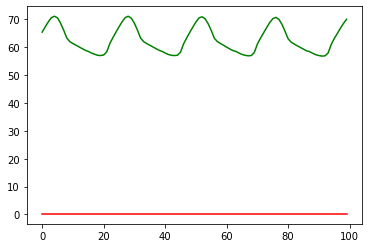

In [37]:
plot_predictions1(model3, X_test, y_test)

In [38]:
temp_df = pd.DataFrame({'Hly_Normal': temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df
#seconds starts from a neg number, can make it start from 0 by adding values

,Hly_Normal,Seconds
date,,
1900-01-01 00:00:00,48.8,-2.208989e+09
1900-01-01 01:00:00,48.5,-2.208985e+09
1900-01-01 02:00:00,47.6,-2.208982e+09
1900-01-01 03:00:00,47.2,-2.208978e+09
1900-01-01 04:00:00,46.8,-2.208974e+09
...,...,...
1900-12-31 19:00:00,51.5,-2.177471e+09
1900-12-31 20:00:00,51.0,-2.177467e+09
1900-12-31 21:00:00,50.5,-2.177464e+09


# circular time

representing in seconds doesn't show how close December 31st is to January 1st. This wraps time around in a circle

In [39]:
day = 60 * 60 * 24 #60 s in a min, 60 min in an hour, 24 hours in a day
year = 365.2425*day #num seconds in a year
temp_df['Day sin'] = np.sin(temp_df['Seconds']*2*(np.pi/day))
temp_df['Day cos'] = np.cos(temp_df['Seconds']*2*(np.pi/day))
temp_df['Year sin'] = np.sin(temp_df['Seconds']*2*(np.pi/year))
temp_df['Year cos'] = np.cos(temp_df['Seconds']*2*(np.pi/year))

In [40]:
temp_df

,Hly_Normal,Seconds,Day sin,Day cos,Year sin,Year cos
date,,,,,,
1900-01-01 00:00:00,48.8,-2.208989e+09,9.878771e-12,1.000000,-0.000430,1.000000
1900-01-01 01:00:00,48.5,-2.208985e+09,2.588190e-01,0.965926,0.000287,1.000000
1900-01-01 02:00:00,47.6,-2.208982e+09,5.000000e-01,0.866025,0.001003,0.999999
1900-01-01 03:00:00,47.2,-2.208978e+09,7.071068e-01,0.707107,0.001720,0.999999
1900-01-01 04:00:00,46.8,-2.208974e+09,8.660254e-01,0.500000,0.002437,0.999997
...,...,...,...,...,...,...
1900-12-31 19:00:00,51.5,-2.177471e+09,-9.659258e-01,0.258819,-0.008186,0.999966
1900-12-31 20:00:00,51.0,-2.177467e+09,-8.660254e-01,0.500000,-0.007469,0.999972
1900-12-31 21:00:00,50.5,-2.177464e+09,-7.071068e-01,0.707107,-0.006752,0.999977


In [41]:
temp_df = temp_df.drop('Seconds', axis = 1)
temp_df.head()

,Hly_Normal,Day sin,Day cos,Year sin,Year cos
date,,,,,
1900-01-01 00:00:00,48.8,9.878771e-12,1.000000,-0.000430,1.000000
1900-01-01 01:00:00,48.5,2.588190e-01,0.965926,0.000287,1.000000
1900-01-01 02:00:00,47.6,5.000000e-01,0.866025,0.001003,0.999999
1900-01-01 03:00:00,47.2,7.071068e-01,0.707107,0.001720,0.999999
1900-01-01 04:00:00,46.8,8.660254e-01,0.500000,0.002437,0.999997


In [42]:
# [[[t1,ds1], [t2,ds2], [t3,ds3], [t4,ds4], [t5,ds5]]] [t6]

def df_to_X_y2(df, window_size= 6):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [ r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)
    return np.array(X), np.array(y)
        

In [43]:
X2, y2 = df_to_X_y2(temp_df)
X2.shape, y2.shape

((8721, 6, 5), (8721,))

In [44]:
X2_train, y2_train = X2[:6000], y2[:6000]
X2_val, y2_val = X2[6000:6500], y2[6000:6500]
X2_test, y2_test = X2[6500:], y2[6500:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((6000, 6, 5), (6000,), (500, 6, 5), (500,), (2221, 6, 5), (2221,))

# Preprocessing Data

Normalizing data

In [47]:
temp_train_mean = np.mean(X2_train[:,:,0]) #0 is just temperature in the training test
temp_training_std = np.std(X2_train[:,:,0])

def preprocess(X):
    X[:,:,0] = (X[:,:,0] - temp_train_mean)/temp_training_std
    return X

In [54]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[-9.84004135e+00,  9.65925826e-01,  2.58819045e-01,
         -9.99547638e-01, -3.00752367e-02],
        [-9.83419552e+00,  1.00000000e+00, -1.23647142e-11,
         -9.99568938e-01, -2.93587709e-02],
        [-9.79912052e+00,  9.65925826e-01, -2.58819045e-01,
         -9.99589725e-01, -2.86422900e-02],
        [-9.71435596e+00,  8.66025404e-01, -5.00000000e-01,
         -9.99609999e-01, -2.79257944e-02],
        [-9.65297473e+00,  7.07106781e-01, -7.07106781e-01,
         -9.99629759e-01, -2.72092845e-02],
        [-9.59451641e+00,  5.00000000e-01, -8.66025404e-01,
         -9.99649005e-01, -2.64927606e-02]],

       [[-9.83419552e+00,  1.00000000e+00, -1.23647142e-11,
         -9.99568938e-01, -2.93587709e-02],
        [-9.79912052e+00,  9.65925826e-01, -2.58819045e-01,
         -9.99589725e-01, -2.86422900e-02],
        [-9.71435596e+00,  8.66025404e-01, -5.00000000e-01,
         -9.99609999e-01, -2.79257944e-02],
        [-9.65297473e+00,  7.07106781e-01, -7.07106781e-01,
  

In [55]:
model4 = Sequential()
model4.add(InputLayer((6,5))) #six time steps, 5 variables of input
model4.add(LSTM(64)) #how many windows do we want to slide across
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear')) #linear value, pos or neg (for temp)
model4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                17920     
                                                                 
 dense_12 (Dense)            (None, 8)                 520       
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________


In [58]:
cp4 = ModelCheckpoint('model4/', save_best_only = True) #I want to only save the best model (lowest validation loss)
#learning rate = higher the value, faster model tries to decrease loss
#but we don't want to dec super fast bc it won't find local min/max
model4.compile(loss = MeanSquaredError(), optimizer =Adam(learning_rate = 0.0001), metrics = [RootMeanSquaredError()])


In [59]:
model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs = 10, callbacks = [cp4])

Epoch 1/10
176/188 [===========================>..] - ETA: 0s - loss: 3341.6868 - root_mean_squared_error: 57.8073

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


188/188 [==============================] - 6s 23ms/step - loss: 3340.9954 - root_mean_squared_error: 57.8013 - val_loss: 3958.1865 - val_root_mean_squared_error: 62.9141
Epoch 2/10
174/188 [==========================>...] - ETA: 0s - loss: 3335.6265 - root_mean_squared_error: 57.7549

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


188/188 [==============================] - 4s 22ms/step - loss: 3335.8503 - root_mean_squared_error: 57.7568 - val_loss: 3955.8279 - val_root_mean_squared_error: 62.8954
Epoch 3/10
185/188 [============================>.] - ETA: 0s - loss: 3332.6191 - root_mean_squared_error: 57.7288

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


188/188 [==============================] - 4s 20ms/step - loss: 3333.6897 - root_mean_squared_error: 57.7381 - val_loss: 3953.4719 - val_root_mean_squared_error: 62.8766
Epoch 4/10
181/188 [===========================>..] - ETA: 0s - loss: 3328.4392 - root_mean_squared_error: 57.6926

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


188/188 [==============================] - 4s 22ms/step - loss: 3331.5322 - root_mean_squared_error: 57.7194 - val_loss: 3951.1165 - val_root_mean_squared_error: 62.8579
Epoch 5/10
179/188 [===========================>..] - ETA: 0s - loss: 3331.5022 - root_mean_squared_error: 57.7192

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


188/188 [==============================] - 4s 20ms/step - loss: 3329.3757 - root_mean_squared_error: 57.7007 - val_loss: 3948.7610 - val_root_mean_squared_error: 62.8392
Epoch 6/10
188/188 [==============================] - ETA: 0s - loss: 3327.2192 - root_mean_squared_error: 57.6821

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


188/188 [==============================] - 4s 20ms/step - loss: 3327.2192 - root_mean_squared_error: 57.6821 - val_loss: 3946.4084 - val_root_mean_squared_error: 62.8204
Epoch 7/10
186/188 [============================>.] - ETA: 0s - loss: 3324.9509 - root_mean_squared_error: 57.6624

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


188/188 [==============================] - 4s 23ms/step - loss: 3325.0647 - root_mean_squared_error: 57.6634 - val_loss: 3944.0557 - val_root_mean_squared_error: 62.8017
Epoch 8/10
175/188 [==========================>...] - ETA: 0s - loss: 3321.9412 - root_mean_squared_error: 57.6363

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


188/188 [==============================] - 3s 18ms/step - loss: 3322.9097 - root_mean_squared_error: 57.6447 - val_loss: 3941.7043 - val_root_mean_squared_error: 62.7830
Epoch 9/10
179/188 [===========================>..] - ETA: 0s - loss: 3322.9065 - root_mean_squared_error: 57.6447

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


188/188 [==============================] - 3s 19ms/step - loss: 3320.7566 - root_mean_squared_error: 57.6260 - val_loss: 3939.3518 - val_root_mean_squared_error: 62.7643
Epoch 10/10
184/188 [============================>.] - ETA: 0s - loss: 3319.0374 - root_mean_squared_error: 57.6111

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


188/188 [==============================] - 3s 17ms/step - loss: 3318.6042 - root_mean_squared_error: 57.6073 - val_loss: 3937.0024 - val_root_mean_squared_error: 62.7455


(      Predictions  Actuals
 0        0.187824     67.3
 1        0.187824     69.1
 2        0.187824     70.6
 3        0.187824     71.1
 4        0.187824     70.5
 ...           ...      ...
 2216     0.187824     51.5
 2217     0.187824     51.0
 2218     0.187824     50.5
 2219     0.187824     49.8
 2220     0.187824     49.4
 
 [2221 rows x 2 columns],
 3157.8732118432167)

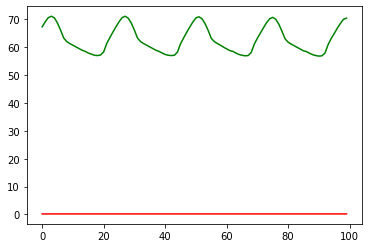

In [60]:
plot_predictions1(model4, X2_test, y2_test)

In [69]:
#add pressure and try to predict it at each time step
p_temp_df = pd.concat([df['years_HLY_TEMP_NORMAL'], temp_df], axis = 1)
p_temp_df.head()

,years_HLY_TEMP_NORMAL,Hly_Normal,Day sin,Day cos,Year sin,Year cos
date,,,,,,
1900-01-01 00:00:00,30,48.8,9.878771e-12,1.000000,-0.000430,1.000000
1900-01-01 01:00:00,30,48.5,2.588190e-01,0.965926,0.000287,1.000000
1900-01-01 02:00:00,30,47.6,5.000000e-01,0.866025,0.001003,0.999999
1900-01-01 03:00:00,30,47.2,7.071068e-01,0.707107,0.001720,0.999999
1900-01-01 04:00:00,30,46.8,8.660254e-01,0.500000,0.002437,0.999997


In [104]:
def df_to_X_y3(df, window_size= 7):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [ r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = [df_as_np[i+window_size][0],df_as_np[i+window_size][1]]
        y.append(label)
    return np.array(X), np.array(y)
        

In [107]:
X3, y3 = df_to_X_y3(p_temp_df)
X3.shape, y3.shape

((8720, 7, 6), (8720, 2))

In [108]:
X3_train, y3_train = X3[:6000], y3[:6000]
X3_val, y3_val = X3[6000:6500], y3[6000:6500]
X3_test, y3_test = X3[6500:], y3[6500:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((6000, 7, 6), (6000, 2), (500, 7, 6), (500, 2), (2220, 7, 6), (2220, 2))

In [109]:
p_training_mean3 = np.mean(X3_train[:,:,0])
p_training_std3 = np.mean(X3_train[:,:,0])

In [110]:
def preprocess3(X):
    X[:,:,0] = (X[:,:,0] - p_training_mean3)/p_training_std3
    X[:,:,1] = (X[:,:,1] - p_training_std3)/p_training_std3

def preprocess_output(y):
    y[:,0] = (y[:,0] - p_training_mean3)/p_training_std3
    y[:,1] = (y[:,1] - p_training_mean3)/p_training_std3
    return y

In [111]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

In [112]:
preprocess_output(X3_train)
preprocess_output(X3_val)
preprocess_output(X3_test)

array([[[-1.00000000e+00, -9.70000000e-01, -9.67802472e-01,
         -9.91372698e-01, -1.03331825e+00, -1.00100251e+00],
        [-1.00000000e+00, -9.69777778e-01, -9.66666667e-01,
         -1.00000000e+00, -1.03331896e+00, -1.00097863e+00],
        [ 0.00000000e+00,  9.46666667e-01,  9.65925826e-01,
         -2.58819045e-01, -9.99589725e-01, -2.86422900e-02],
        ...,
        [ 0.00000000e+00,  1.11333333e+00,  7.07106781e-01,
         -7.07106781e-01, -9.99629759e-01, -2.72092845e-02],
        [ 0.00000000e+00,  1.18000000e+00,  5.00000000e-01,
         -8.66025404e-01, -9.99649005e-01, -2.64927606e-02],
        [ 0.00000000e+00,  1.24333333e+00,  2.58819045e-01,
         -9.65925826e-01, -9.99667738e-01, -2.57762230e-02]],

       [[-1.00000000e+00, -9.69777778e-01, -9.66666667e-01,
         -1.00000000e+00, -1.03331896e+00, -1.00097863e+00],
        [-1.00000000e+00, -9.68444444e-01, -9.67802472e-01,
         -1.00862730e+00, -1.03331966e+00, -1.00095474e+00],
        [ 0.00000

In [113]:
model5 = Sequential()
model5.add(InputLayer((7,6))) #six time steps, 6 variables of input
model5.add(LSTM(64)) #how many windows do we want to slide across
model5.add(Dense(8, 'relu'))
model5.add(Dense(2, 'linear')) #linear value, pos or neg (for temp)
model5.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 64)                18176     
                                                                 
 dense_18 (Dense)            (None, 8)                 520       
                                                                 
 dense_19 (Dense)            (None, 2)                 18        
                                                                 
Total params: 18,714
Trainable params: 18,714
Non-trainable params: 0
_________________________________________________________________


In [114]:
cp5 = ModelCheckpoint('model5/', save_best_only = True) #I want to only save the best model (lowest validation loss)
#learning rate = higher the value, faster model tries to decrease loss
#but we don't want to dec super fast bc it won't find local min/max
model5.compile(loss = MeanSquaredError(), optimizer =Adam(learning_rate = 0.0001), metrics = [RootMeanSquaredError()])


In [115]:
model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs = 10, callbacks = [cp5])

Epoch 1/10
187/188 [============================>.] - ETA: 0s - loss: 2062.9290 - root_mean_squared_error: 45.4195

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


188/188 [==============================] - 7s 31ms/step - loss: 2062.7776 - root_mean_squared_error: 45.4178 - val_loss: 2188.9580 - val_root_mean_squared_error: 46.7863
Epoch 2/10
179/188 [===========================>..] - ETA: 0s - loss: 1552.0194 - root_mean_squared_error: 39.3957

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


188/188 [==============================] - 5s 24ms/step - loss: 1542.0129 - root_mean_squared_error: 39.2685 - val_loss: 1539.2153 - val_root_mean_squared_error: 39.2328
Epoch 3/10
181/188 [===========================>..] - ETA: 0s - loss: 1182.0728 - root_mean_squared_error: 34.3813

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


188/188 [==============================] - 5s 25ms/step - loss: 1179.2510 - root_mean_squared_error: 34.3402 - val_loss: 1265.9336 - val_root_mean_squared_error: 35.5800
Epoch 4/10
188/188 [==============================] - ETA: 0s - loss: 960.3784 - root_mean_squared_error: 30.9900

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


188/188 [==============================] - 5s 24ms/step - loss: 960.3784 - root_mean_squared_error: 30.9900 - val_loss: 1041.3464 - val_root_mean_squared_error: 32.2699
Epoch 5/10
176/188 [===========================>..] - ETA: 0s - loss: 779.1354 - root_mean_squared_error: 27.9130

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


188/188 [==============================] - 4s 21ms/step - loss: 774.0941 - root_mean_squared_error: 27.8225 - val_loss: 845.7380 - val_root_mean_squared_error: 29.0816
Epoch 6/10
187/188 [============================>.] - ETA: 0s - loss: 613.8344 - root_mean_squared_error: 24.7757

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


188/188 [==============================] - 5s 26ms/step - loss: 613.5453 - root_mean_squared_error: 24.7698 - val_loss: 674.7712 - val_root_mean_squared_error: 25.9764
Epoch 7/10
175/188 [==========================>...] - ETA: 0s - loss: 480.4062 - root_mean_squared_error: 21.9182

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


188/188 [==============================] - 4s 23ms/step - loss: 475.8062 - root_mean_squared_error: 21.8130 - val_loss: 527.1235 - val_root_mean_squared_error: 22.9592
Epoch 8/10
181/188 [===========================>..] - ETA: 0s - loss: 361.9033 - root_mean_squared_error: 19.0238

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


188/188 [==============================] - 5s 27ms/step - loss: 360.2740 - root_mean_squared_error: 18.9809 - val_loss: 402.7899 - val_root_mean_squared_error: 20.0696
Epoch 9/10
177/188 [===========================>..] - ETA: 0s - loss: 269.2331 - root_mean_squared_error: 16.4083

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


188/188 [==============================] - 3s 18ms/step - loss: 266.4846 - root_mean_squared_error: 16.3244 - val_loss: 301.1986 - val_root_mean_squared_error: 17.3551
Epoch 10/10
181/188 [===========================>..] - ETA: 0s - loss: 194.2758 - root_mean_squared_error: 13.9383

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


188/188 [==============================] - 4s 21ms/step - loss: 193.1528 - root_mean_squared_error: 13.8979 - val_loss: 221.0362 - val_root_mean_squared_error: 14.8673


In [123]:
def plot_predictions2(model,X,y,start = 0, end =100):
    predictions = model.predict(X)
    p_preds, temp_preds = predictions[:,0], predictions[:,1]
    p_actuals, temp_actuals = y[:,0], y[:,1]
    df = pd.DataFrame(data = { 'Temperature predictions': temp_preds,
                                'Temperature Actuals': temp_actuals,
                                'Pressure Predictions': p_preds,
                                'Pressure Actuals': p_actuals
        
                            })
    plt.plot(df['Temperature predictions'][start:end])
    plt.plot(df['Temperature Actuals'][start:end])
    plt.plot(df['Pressure Predictions'][start:end])
    plt.plot(df['Pressure Actuals'][start:end])
    return df[start:end]

,Temperature predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,47.834480,69.1,15.938173,30.0
1,47.837559,70.6,15.939247,30.0
2,47.840103,71.1,15.940134,30.0
3,47.841816,70.5,15.940733,30.0
4,47.842575,68.6,15.941000,30.0
...,...,...,...,...
95,47.830223,66.8,15.936670,30.0
96,47.833588,68.5,15.937849,30.0
97,47.836658,70.0,15.938917,30.0
98,47.839249,70.4,15.939819,30.0


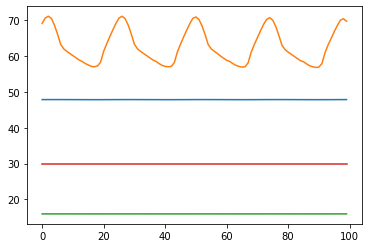

In [124]:
plot_predictions2(model5, X3_test, y3_test)

In [ ]:
# undo to figure out how we calculated predicted values
def postprocess_temp(arr):
    arr = (arr*temp_training_std3) + temp_training_mean3
    return arr